In [1]:
#Exploratory data analysis packages
import pandas as pd
import numpy as np
import random

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("finaldataset.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,url,label
0,0,http://br14.teste.website/~exclus23/produto/18...,1
1,1,http://www.boutycone.fr/mail/assure_somtc=true...,1
2,2,https://www.stoneville.bfb.asn.au/sign-in,1
3,3,http://radioramamexicali.com/alor/index.html,1
4,4,http://radioramabajio.com/dhll/DHLAUTO/dhl2.htm,1


In [4]:
dataset.tail(5)

,Unnamed: 0,url,label
49995,49995,boltek.com,0
49996,49996,congressionalaward.org,0
49997,49997,agenet.com,0
49998,49998,celebsrc.com,0
49999,49999,marriagesherpa.com,0


In [5]:
dataset.shape

(50000, 3)

In [6]:
dataset.groupby(by='label').count()

,Unnamed: 0,url
label,,
0,47290,47290
1,2710,2710


In [7]:
#Check for any missing data. If the output is not 0 then there is a value missing in the data set
dataset.isnull().sum().sum()

0

In [8]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens
print("Done")

Done


In [9]:
# Labels which indicate if an URL is spam or ham
y = dataset["label"]

In [10]:
y.count()

50000

In [11]:
# Features here are the URLs
url_list = dataset["url"]

In [12]:
url_list.count()

50000

In [13]:
# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [14]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import time
start_train=time.time()

In [17]:
svclassifier=SVC(kernel='rbf',max_iter=1000)
svclassifier.fit(X_train,y_train)

/home/swapneel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/swapneel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=1000, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
end_train=time.time()
print("Time to Train : ",end_train-start_train," Seconds")

Time to Train :  3.8642566204071045  Seconds


In [19]:
# svmclf = SVC(gamma='auto')
# svmclf.fit(X_train,y_train)

In [20]:
start_test=time.time()

In [21]:
# Accuracy of Our Model Using Test Data
print("Accuracy ",svclassifier.score(X_test, y_test)*100,"%")

Accuracy  99.88 %


In [22]:
# Accuracy of Our Model Using Train Data
print("Accuracy ",svclassifier.score(X_train, y_train)*100,"%")

Accuracy  99.87 %


In [23]:
end_test=time.time()
print("Time to Test : ",end_test-start_test," Seconds")

Time to Test :  5.377979278564453  Seconds


In [24]:
X_predict1 = ["https://www.google.com", 
"https://www.pes.edu","www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com"]

In [25]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = svclassifier.predict(X_predict1)
print(New_predict1)

[1 1 0 0]


In [26]:
# get support vectors
svclassifier.support_vectors_

<2000x104945 sparse matrix of type '<class 'numpy.float64'>'
	with 13944 stored elements in Compressed Sparse Row format>

In [27]:
# get indices of support vectors
svclassifier.support_

array([  109,   140,   224, ..., 39967, 39986, 39998], dtype=int32)

In [28]:
# get number of support vectors for each class
svclassifier.n_support_

array([1000, 1000], dtype=int32)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
predicted = svclassifier.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
# print(y_test)
# print(predicted)

In [31]:
print(matrix)

[[9458    2]
 [  10  530]]


In [32]:
from sklearn.metrics import classification_report

In [33]:
report = classification_report(y_test, predicted)

In [34]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9460
           1       1.00      0.98      0.99       540

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



In [35]:
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
matrix

array([[9458,    2],
       [  10,  530]])

In [37]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

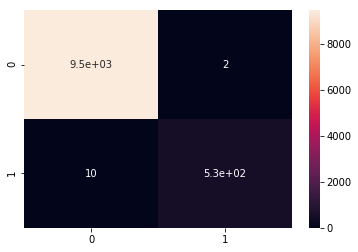

In [38]:
# Confusion Matrix Graph With Seaborn
sns.heatmap(matrix,annot=True)
plt.show()

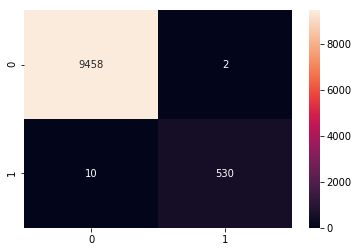

In [39]:
# Setting formate to integer with "d"
sns.heatmap(matrix,annot=True,fmt="d")
plt.show()

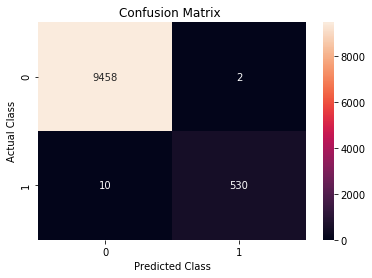

In [40]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()